# Market Regime Detection Analysis

## Introduction

Market regimes refer to distinct periods during which the statistical properties of asset returns (like mean, volatility, and correlation) behave differently. Identifying these regimes is crucial for dynamic asset allocation, risk management, and strategy development. For example, a portfolio might perform well in a "Bull" regime but poorly in a "Bear" regime.

This notebook walks through the process of detecting market regimes for a portfolio of European assets using techniques like Hidden Markov Models (HMM) and K-means clustering. We will analyze:

1.  **Market Regimes:** Using HMM on asset returns to identify periods like Bull, Bear, or Sideways markets.
2.  **Volatility Regimes:** Using K-means clustering on volatility measures to identify periods of Low, Medium, or High volatility.
3.  **Correlation Regimes:** Using K-means clustering on rolling average correlations to identify periods of Low or High correlation between assets.

The analysis relies on helper scripts located in the `src/` directory for data collection, processing, and the core regime detection logic.

## Setup

First, let's import necessary libraries and define the project paths. We also need to ensure the helper scripts from the `src` directory are accessible.

In [1]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import importlib # To potentially reload modules if scripts change
from IPython.display import display, Image # To display images in the notebook

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Add src directory to Python path to import helper scripts
# Assumes the notebook is in the project root directory
src_path = os.path.abspath(os.path.join('.', 'src'))
if src_path not in sys.path:
    sys.path.insert(0, src_path) # Insert at beginning to ensure it's checked first

# Define project paths (relative to the notebook location)
PROJECT_DIR = os.path.abspath('.') # Assumes notebook is in the project root
RAW_DATA_DIR = os.path.join(PROJECT_DIR, 'data/raw')
PROCESSED_DATA_DIR = os.path.join(PROJECT_DIR, 'data/processed')
MODELS_DIR = os.path.join(PROJECT_DIR, 'models')
RESULTS_DIR = os.path.join(PROJECT_DIR, 'results')
FIGURES_DIR = os.path.join(RESULTS_DIR, 'figures')
TABLES_DIR = os.path.join(RESULTS_DIR, 'tables')

# Ensure results directories exist
os.makedirs(FIGURES_DIR, exist_ok=True)
os.makedirs(TABLES_DIR, exist_ok=True)
os.makedirs(MODELS_DIR, exist_ok=True)

print(f"Project Directory: {PROJECT_DIR}")
print(f"Source Directory added to path: {src_path}")
print(f"Processed Data Directory: {PROCESSED_DATA_DIR}")
print(f"Figures Directory: {FIGURES_DIR}")

Project Directory: C:\Users\yahia\Desktop\app\internship\New Projects\new\regime_detection_project_with_notebook\home\ubuntu\regime_detection_project_final_with_notebook
Source Directory added to path: C:\Users\yahia\Desktop\app\internship\New Projects\new\regime_detection_project_with_notebook\home\ubuntu\regime_detection_project_final_with_notebook\src
Processed Data Directory: C:\Users\yahia\Desktop\app\internship\New Projects\new\regime_detection_project_with_notebook\home\ubuntu\regime_detection_project_final_with_notebook\data/processed
Figures Directory: C:\Users\yahia\Desktop\app\internship\New Projects\new\regime_detection_project_with_notebook\home\ubuntu\regime_detection_project_final_with_notebook\results\figures


In [2]:
import src.collect_data as collecct_data
import yfinance as yf


In [3]:
trial = yf.download('MSFT' ,start='2010-01-01')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
2025-05-11 01:27:49,341 - yfinance - ERROR - 
1 Failed download:
2025-05-11 01:27:49,341 - yfinance - ERROR - ['MSFT']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


In [17]:
collecct_data.main()

2025-05-08 15:59:14,321 - src.collect_data - INFO - Starting data collection process using yfinance
2025-05-08 15:59:14,324 - src.collect_data - INFO - Processing Finance (Symbol: EUFN)
2025-05-08 15:59:14,326 - src.collect_data - INFO - Downloading data for EUFN from 2010-01-01 to 2025-05-08
2025-05-08 15:59:15,787 - yfinance - ERROR - 
1 Failed download:
2025-05-08 15:59:15,788 - yfinance - ERROR - ['EUFN']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')
2025-05-08 15:59:15,793 - src.collect_data - WARNING - No data downloaded for EUFN. It might be an invalid ticker or delisted for the period.
2025-05-08 15:59:15,793 - src.collect_data - WARNING - No data available or error for Finance (Symbol: EUFN)
2025-05-08 15:59:15,843 - src.collect_data - INFO - Processing Technology (Symbol: ESTX)
2025-05-08 15:59:15,845 - src.collect_data - INFO - Downloading data for ESTX from 2010-01-01 to 2025-05-08


(0, 6)


2025-05-08 15:59:17,373 - yfinance - ERROR - 
1 Failed download:
2025-05-08 15:59:17,374 - yfinance - ERROR - ['ESTX']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')
2025-05-08 15:59:17,377 - src.collect_data - WARNING - No data downloaded for ESTX. It might be an invalid ticker or delisted for the period.
2025-05-08 15:59:17,381 - src.collect_data - WARNING - No data available or error for Technology (Symbol: ESTX)
2025-05-08 15:59:17,381 - src.collect_data - INFO - Processing Healthcare (Symbol: HEAL.L)
2025-05-08 15:59:17,383 - src.collect_data - INFO - Downloading data for HEAL.L from 2010-01-01 to 2025-05-08


(0, 6)


2025-05-08 15:59:18,833 - yfinance - ERROR - 
1 Failed download:
2025-05-08 15:59:18,833 - yfinance - ERROR - ['HEAL.L']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')
2025-05-08 15:59:18,838 - src.collect_data - WARNING - No data downloaded for HEAL.L. It might be an invalid ticker or delisted for the period.
2025-05-08 15:59:18,838 - src.collect_data - WARNING - No data available or error for Healthcare (Symbol: HEAL.L)
2025-05-08 15:59:18,838 - src.collect_data - INFO - Processing Energy (Symbol: IESU.L)
2025-05-08 15:59:18,842 - src.collect_data - INFO - Downloading data for IESU.L from 2010-01-01 to 2025-05-08


(0, 6)


2025-05-08 15:59:19,963 - yfinance - ERROR - 
1 Failed download:
2025-05-08 15:59:19,966 - yfinance - ERROR - ['IESU.L']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')
2025-05-08 15:59:19,972 - src.collect_data - WARNING - No data downloaded for IESU.L. It might be an invalid ticker or delisted for the period.
2025-05-08 15:59:19,974 - src.collect_data - WARNING - No data available or error for Energy (Symbol: IESU.L)
2025-05-08 15:59:19,976 - src.collect_data - INFO - Processing Consumer (Symbol: CPXJ.DE)
2025-05-08 15:59:19,976 - src.collect_data - INFO - Downloading data for CPXJ.DE from 2010-01-01 to 2025-05-08


(0, 6)


2025-05-08 15:59:21,118 - yfinance - ERROR - 
1 Failed download:
2025-05-08 15:59:21,118 - yfinance - ERROR - ['CPXJ.DE']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')
2025-05-08 15:59:21,126 - src.collect_data - WARNING - No data downloaded for CPXJ.DE. It might be an invalid ticker or delisted for the period.
2025-05-08 15:59:21,126 - src.collect_data - WARNING - No data available or error for Consumer (Symbol: CPXJ.DE)
2025-05-08 15:59:21,128 - src.collect_data - INFO - Processing Industrial (Symbol: SX4P.DE)
2025-05-08 15:59:21,128 - src.collect_data - INFO - Downloading data for SX4P.DE from 2010-01-01 to 2025-05-08


(0, 6)


2025-05-08 15:59:22,194 - yfinance - ERROR - 
1 Failed download:
2025-05-08 15:59:22,194 - yfinance - ERROR - ['SX4P.DE']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')
2025-05-08 15:59:22,197 - src.collect_data - WARNING - No data downloaded for SX4P.DE. It might be an invalid ticker or delisted for the period.
2025-05-08 15:59:22,202 - src.collect_data - WARNING - No data available or error for Industrial (Symbol: SX4P.DE)
2025-05-08 15:59:22,203 - src.collect_data - INFO - Processing Materials (Symbol: SXPP.DE)
2025-05-08 15:59:22,203 - src.collect_data - INFO - Downloading data for SXPP.DE from 2010-01-01 to 2025-05-08


(0, 6)


2025-05-08 15:59:23,253 - yfinance - ERROR - 
1 Failed download:
2025-05-08 15:59:23,254 - yfinance - ERROR - ['SXPP.DE']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')
2025-05-08 15:59:23,260 - src.collect_data - WARNING - No data downloaded for SXPP.DE. It might be an invalid ticker or delisted for the period.
2025-05-08 15:59:23,260 - src.collect_data - WARNING - No data available or error for Materials (Symbol: SXPP.DE)
2025-05-08 15:59:23,262 - src.collect_data - INFO - Processing Benchmark_STOXX600 (Symbol: ^STOXX)
2025-05-08 15:59:23,264 - src.collect_data - INFO - Downloading data for ^STOXX from 2010-01-01 to 2025-05-08


(0, 6)


2025-05-08 15:59:24,298 - yfinance - ERROR - 
1 Failed download:
2025-05-08 15:59:24,300 - yfinance - ERROR - ['^STOXX']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')
2025-05-08 15:59:24,304 - src.collect_data - WARNING - No data downloaded for ^STOXX. It might be an invalid ticker or delisted for the period.
2025-05-08 15:59:24,305 - src.collect_data - WARNING - No data available or error for Benchmark_STOXX600 (Symbol: ^STOXX)
2025-05-08 15:59:24,305 - src.collect_data - INFO - Processing Benchmark_EUROSTOXX50 (Symbol: ^STOXX50E)
2025-05-08 15:59:24,307 - src.collect_data - INFO - Downloading data for ^STOXX50E from 2010-01-01 to 2025-05-08


(0, 6)


2025-05-08 15:59:25,383 - yfinance - ERROR - 
1 Failed download:
2025-05-08 15:59:25,385 - yfinance - ERROR - ['^STOXX50E']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')
2025-05-08 15:59:25,389 - src.collect_data - WARNING - No data downloaded for ^STOXX50E. It might be an invalid ticker or delisted for the period.
2025-05-08 15:59:25,389 - src.collect_data - WARNING - No data available or error for Benchmark_EUROSTOXX50 (Symbol: ^STOXX50E)
2025-05-08 15:59:25,391 - src.collect_data - INFO - Data collection process completed


(0, 6)


## Step 1: Data Collection

**Intuition:** The first step is to gather historical price data for the assets we want to analyze (European sector ETFs and benchmark indices). This data forms the basis for calculating returns and volatility, which are key inputs for regime detection models.

**Implementation:** The `src/collect_data.py` script is designed for this purpose. It uses the `yfinance` library to download daily price data (Open, High, Low, Close, Volume, Adjusted Close) for a predefined list of tickers and saves them as individual CSV files in the `data/raw/` directory.

**Known Limitation:** As mentioned in the README, `yfinance` currently faces issues downloading data for some European symbols. Therefore, this project includes dummy CSV files in `data/raw/` to allow the subsequent steps to run. If you have access to reliable data or alternative symbols, you can modify `collect_data.py` and run it. For this notebook, we will assume the raw data (dummy or real) is already present.

In [9]:
# We won't run collect_data.py here because it uses dummy data anyway.
# We'll proceed assuming the data exists in data/raw/
print("Checking for raw data files...")
try:
    raw_files = os.listdir(RAW_DATA_DIR)
    if not raw_files:
        print("Warning: No files found in data/raw/. Please ensure dummy data or real data exists.")
    else:
        print(f"Found {len(raw_files)} files in data/raw/:")
        for f in sorted(raw_files)[:5]: # Print first 5 files alphabetically
            print(f" - {f}")
        if len(raw_files) > 5:
            print(" - ...and more.")
except FileNotFoundError:
    print(f"Error: Raw data directory not found at {RAW_DATA_DIR}")

Checking for raw data files...
Found 1 files in data/raw/:
 - .ipynb_checkpoints


## Step 2: Data Processing

**Intuition:** Raw financial data often contains inconsistencies, missing values, or requires transformation before it can be used in models. This step involves cleaning the data, aligning dates across different assets, handling missing values (e.g., using forward-fill), and calculating key metrics like daily returns. These processed data series are the direct inputs for our regime detection models.

**Implementation:** The `src/process_data.py` script handles this. It loads the individual raw CSV files, combines them into unified DataFrames for prices and returns, manages missing data, calculates correlations, and saves the processed results (`asset_prices.csv`, `asset_returns.csv`, etc.) into the `data/processed/` directory.

We will now execute this script by importing it and running its `main()` function. The script includes logging, which will be displayed below.

In [3]:
import process_data # Import the script as a module

print("Running data processing script (process_data.py)...")
try:
    # Reload the module in case it was changed
    importlib.reload(process_data)
    # Execute the main function from the script
    process_data.main()
    print("\nData processing script finished.")
except Exception as e:
    print(f"Error running process_data.py: {e}")

# Verify that processed files were created
print("\nChecking for processed data files...")
try:
    processed_files = os.listdir(PROCESSED_DATA_DIR)
    if not processed_files:
        print("Warning: No files found in data/processed/. Data processing may have failed.")
    else:
        print(f"Found {len(processed_files)} files in data/processed/:")
        for f in sorted(processed_files):
            print(f" - {f}")
except FileNotFoundError:
    print(f"Error: Processed data directory not found at {PROCESSED_DATA_DIR}")

2025-05-05 05:25:24,117 - process_data - INFO - Starting data processing script


2025-05-05 05:25:24,118 - process_data - INFO - Loading raw data from: /home/ubuntu/regime_detection_project_updated/home/ubuntu/regime_detection_project/data/raw


2025-05-05 05:25:24,119 - process_data - INFO - Found CSV files: ['finance_data.csv', 'technology_data.csv', 'healthcare_data.csv', 'energy_data.csv', 'consumer_data.csv', 'industrial_data.csv', 'materials_data.csv', 'benchmark_stoxx600_data.csv', 'benchmark_eurostoxx50_data.csv']


2025-05-05 05:25:24,129 - process_data - INFO - Loaded 5 rows of data for Finance from finance_data.csv


2025-05-05 05:25:24,134 - process_data - INFO - Loaded 5 rows of data for Technology from technology_data.csv


2025-05-05 05:25:24,138 - process_data - INFO - Loaded 5 rows of data for Healthcare from healthcare_data.csv


2025-05-05 05:25:24,142 - process_data - INFO - Loaded 5 rows of data for Energy from energy_data.csv


2025-05-05 05:25:24,146 - process_data - INFO - Loaded 5 rows of data for Consumer from consumer_data.csv


2025-05-05 05:25:24,149 - process_data - INFO - Loaded 5 rows of data for Industrial from industrial_data.csv


2025-05-05 05:25:24,153 - process_data - INFO - Loaded 5 rows of data for Materials from materials_data.csv


2025-05-05 05:25:24,157 - process_data - INFO - Loaded 5 rows of data for Benchmark Stoxx600 from benchmark_stoxx600_data.csv


2025-05-05 05:25:24,161 - process_data - INFO - Loaded 5 rows of data for Benchmark Eurostoxx50 from benchmark_eurostoxx50_data.csv


2025-05-05 05:25:24,161 - process_data - INFO - Processing asset data...


2025-05-05 05:25:24,163 - process_data - INFO - Combined DataFrame shape before processing: (5, 9)


2025-05-05 05:25:24,167 - process_data - INFO - Combined DataFrame shape after filling NaNs: (5, 9)


2025-05-05 05:25:24,169 - process_data - INFO - Calculated returns DataFrame shape: (4, 9)


2025-05-05 05:25:24,170 - process_data - INFO - Calculated correlation matrix.


2025-05-05 05:25:24,172 - process_data - INFO - Extracted benchmark columns as placeholder for asset_class_indices.


2025-05-05 05:25:24,173 - process_data - INFO - Saving processed data to: /home/ubuntu/regime_detection_project_updated/home/ubuntu/regime_detection_project/data/processed


2025-05-05 05:25:24,177 - process_data - INFO - Saved asset_prices data ((5, 9)) to /home/ubuntu/regime_detection_project_updated/home/ubuntu/regime_detection_project/data/processed/asset_prices.csv


2025-05-05 05:25:24,179 - process_data - INFO - Saved asset_returns data ((4, 9)) to /home/ubuntu/regime_detection_project_updated/home/ubuntu/regime_detection_project/data/processed/asset_returns.csv


2025-05-05 05:25:24,181 - process_data - INFO - Saved asset_correlations data ((9, 9)) to /home/ubuntu/regime_detection_project_updated/home/ubuntu/regime_detection_project/data/processed/asset_correlations.csv


2025-05-05 05:25:24,183 - process_data - INFO - Saved asset_class_indices data ((5, 2)) to /home/ubuntu/regime_detection_project_updated/home/ubuntu/regime_detection_project/data/processed/asset_class_indices.csv


2025-05-05 05:25:24,184 - process_data - INFO - Data processing script completed


Running data processing script (process_data.py)...

Data processing script finished.

Checking for processed data files...
Found 4 files in data/processed/:
 - asset_class_indices.csv
 - asset_correlations.csv
 - asset_prices.csv
 - asset_returns.csv


## Step 3: Regime Detection

**Intuition:** Now that we have processed data, we can apply models to identify underlying market states or regimes.

*   **Market Regimes (HMM):** Hidden Markov Models assume that the market transitions between a set of unobservable (hidden) states (regimes), and the observed data (e.g., returns) depends on the current hidden state. By fitting an HMM to the returns data, we can infer the most likely sequence of hidden states over time. We typically label these states based on their statistical properties (e.g., high mean/low volatility = Bull, low mean/high volatility = Bear).
*   **Volatility Regimes (K-means):** Volatility itself often exhibits clustering behavior (periods of high vol followed by high vol, low vol followed by low vol). K-means clustering can be applied to a rolling measure of volatility to group time periods into distinct volatility regimes (e.g., Low, Medium, High).
*   **Correlation Regimes (K-means):** Similarly, the average correlation between assets in a portfolio can change over time. K-means can be used on rolling average pairwise correlations to identify periods where assets tend to move together (High Correlation) versus periods where they move more independently (Low Correlation).

**Implementation:** The `src/regime_detection.py` script implements these models. It loads the processed data, fits the HMM and K-means models, assigns regime labels, and generates plots visualizing the regimes over time, saving them to `results/figures/`. It may also save the trained models to the `models/` directory.

We will now execute this script by importing it and running its `main()` function.

In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import regime_detection # Import the script as a module

print("Running regime detection script (regime_detection.py)...")
try:
    # Reload the module in case it was changed
    importlib.reload(regime_detection)
    # Execute the main function from the script
    # Redirect matplotlib output to avoid displaying plots here (they are saved to files)
    plt.ioff() # Turn interactive mode off if it was on
    regime_detection.main()
    plt.close('all') # Close all figures generated by the script
    print("\nRegime detection script finished.")
except Exception as e:
    print(f"Error running regime_detection.py: {e}")

# Verify that result files (figures) were created
print("\nChecking for result files (figures)...")
figure_files = []
try:
    figure_files = sorted([f for f in os.listdir(FIGURES_DIR) if f.endswith(".png")])
    if not figure_files:
        print("Warning: No PNG files found in results/figures/. Regime detection may have failed or produced no plots.")
    else:
        print(f"Found {len(figure_files)} PNG files in results/figures/:")
        for f in figure_files:
            print(f" - {f}")
except FileNotFoundError:
    print(f"Error: Figures directory not found at {FIGURES_DIR}")

Fitting a model with 14 free scalar parameters with only 4 data points will result in a degenerate solution.


Running regime detection script (regime_detection.py)...
Starting regime detection analysis...
Loading processed data...
Detecting market regimes for Finance...


Model is not converging.  Current: 6.797591717722042 is not greater than 10.115071873632834. Delta is -3.3174801559107916


Market regimes detected and plotted for Finance.
Detecting volatility regimes for Finance...
Could not calculate rolling volatility or it was all NaN for Finance.
Skipping correlation regime detection due to insufficient assets or returns data.
Skipping combined regime analysis as one or more regime types could not be determined.
Regime detection analysis finished.

Regime detection script finished.

Checking for result files (figures)...
Found 1 PNG files in results/figures/:
 - finance_market_market_regimes.png


## Step 4: Visualizing Results

The `regime_detection.py` script saves the generated plots as PNG files in the `results/figures/` directory. Let's display these plots directly in the notebook.


--- finance_market_market_regimes.png ---


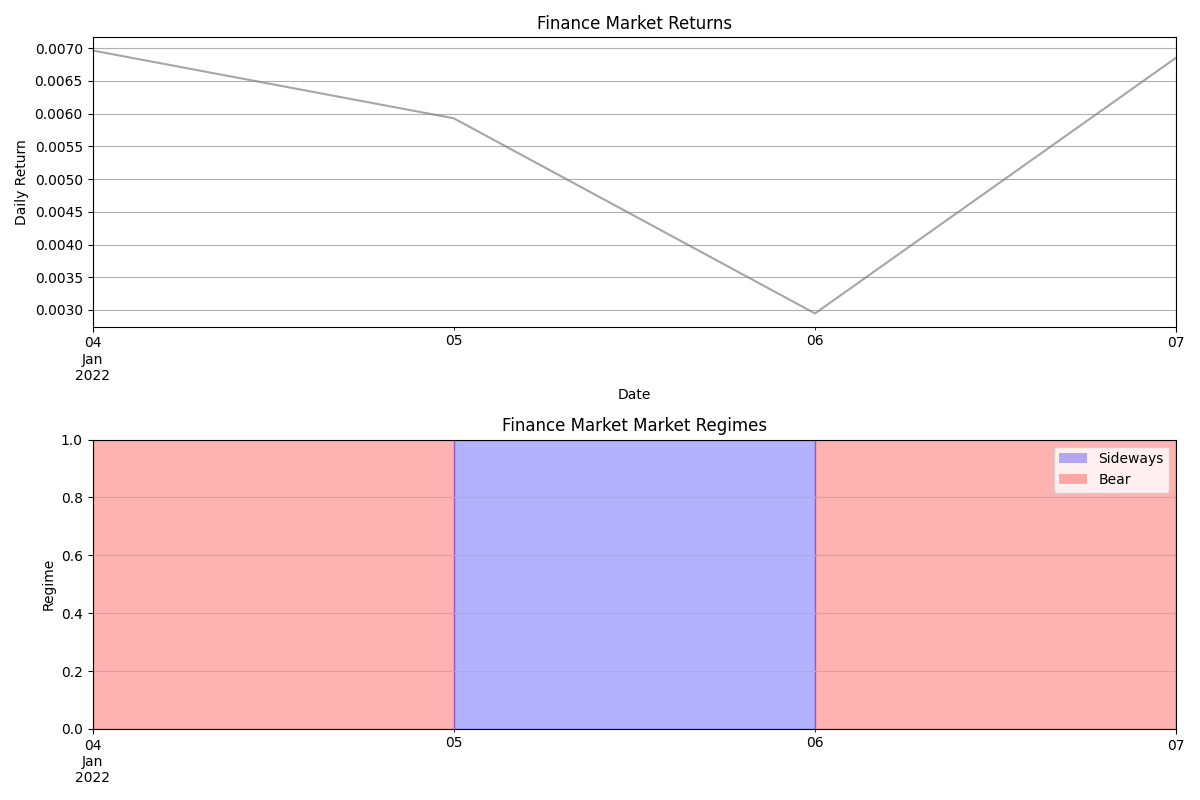

In [8]:
# Display the generated figures
if not figure_files:
    print("No figures to display.")
else:
    for f in figure_files:
        print(f"\n--- {f} ---")
        image_path = os.path.join(FIGURES_DIR, f)
        try:
            display(Image(filename=image_path))
        except FileNotFoundError:
            print(f"Error: Image file not found at {image_path}")
        except Exception as e:
            print(f"Error displaying image {f}: {e}")

## Conclusion

This notebook demonstrated the workflow for detecting market, volatility, and correlation regimes using the provided Python scripts. We executed the data processing and regime detection steps and visualized the resulting plots.

**Important Note:** The results shown here are based on **dummy data** due to limitations in downloading live European asset data via `yfinance`. The detected regimes and plots are illustrative and do not represent actual market conditions. To obtain meaningful results, replace the dummy data in `data/raw/` with actual historical data for valid European tickers.